In [13]:
import numpy as np

data = np.loadtxt('output/m_5Myr.txt') # return (N, 2) array
ts = data[:, 0]                        # return only 1st col
mass = data[:, 1]                      # return only 2nd col

data = np.loadtxt('output/r_5Myr.txt')
radius = data[:, 1]                    # data in AU

p = 5                                  # number of planets
a = np.zeros([ts.size, p])
for j in range(1, p):
    fname = 'output/p' + str(j) + '_5Myr.txt'
    data = np.loadtxt(fname)
    a[:, j] = data[:, 1]               # data in AU
atides = np.zeros([ts.size, p])
for j in range(1, p):
    fname = 'output/p' + str(j) + '_tides_5Myr.txt'
    data = np.loadtxt(fname)
    atides[:, j] = data[:, 1]          # data in AU

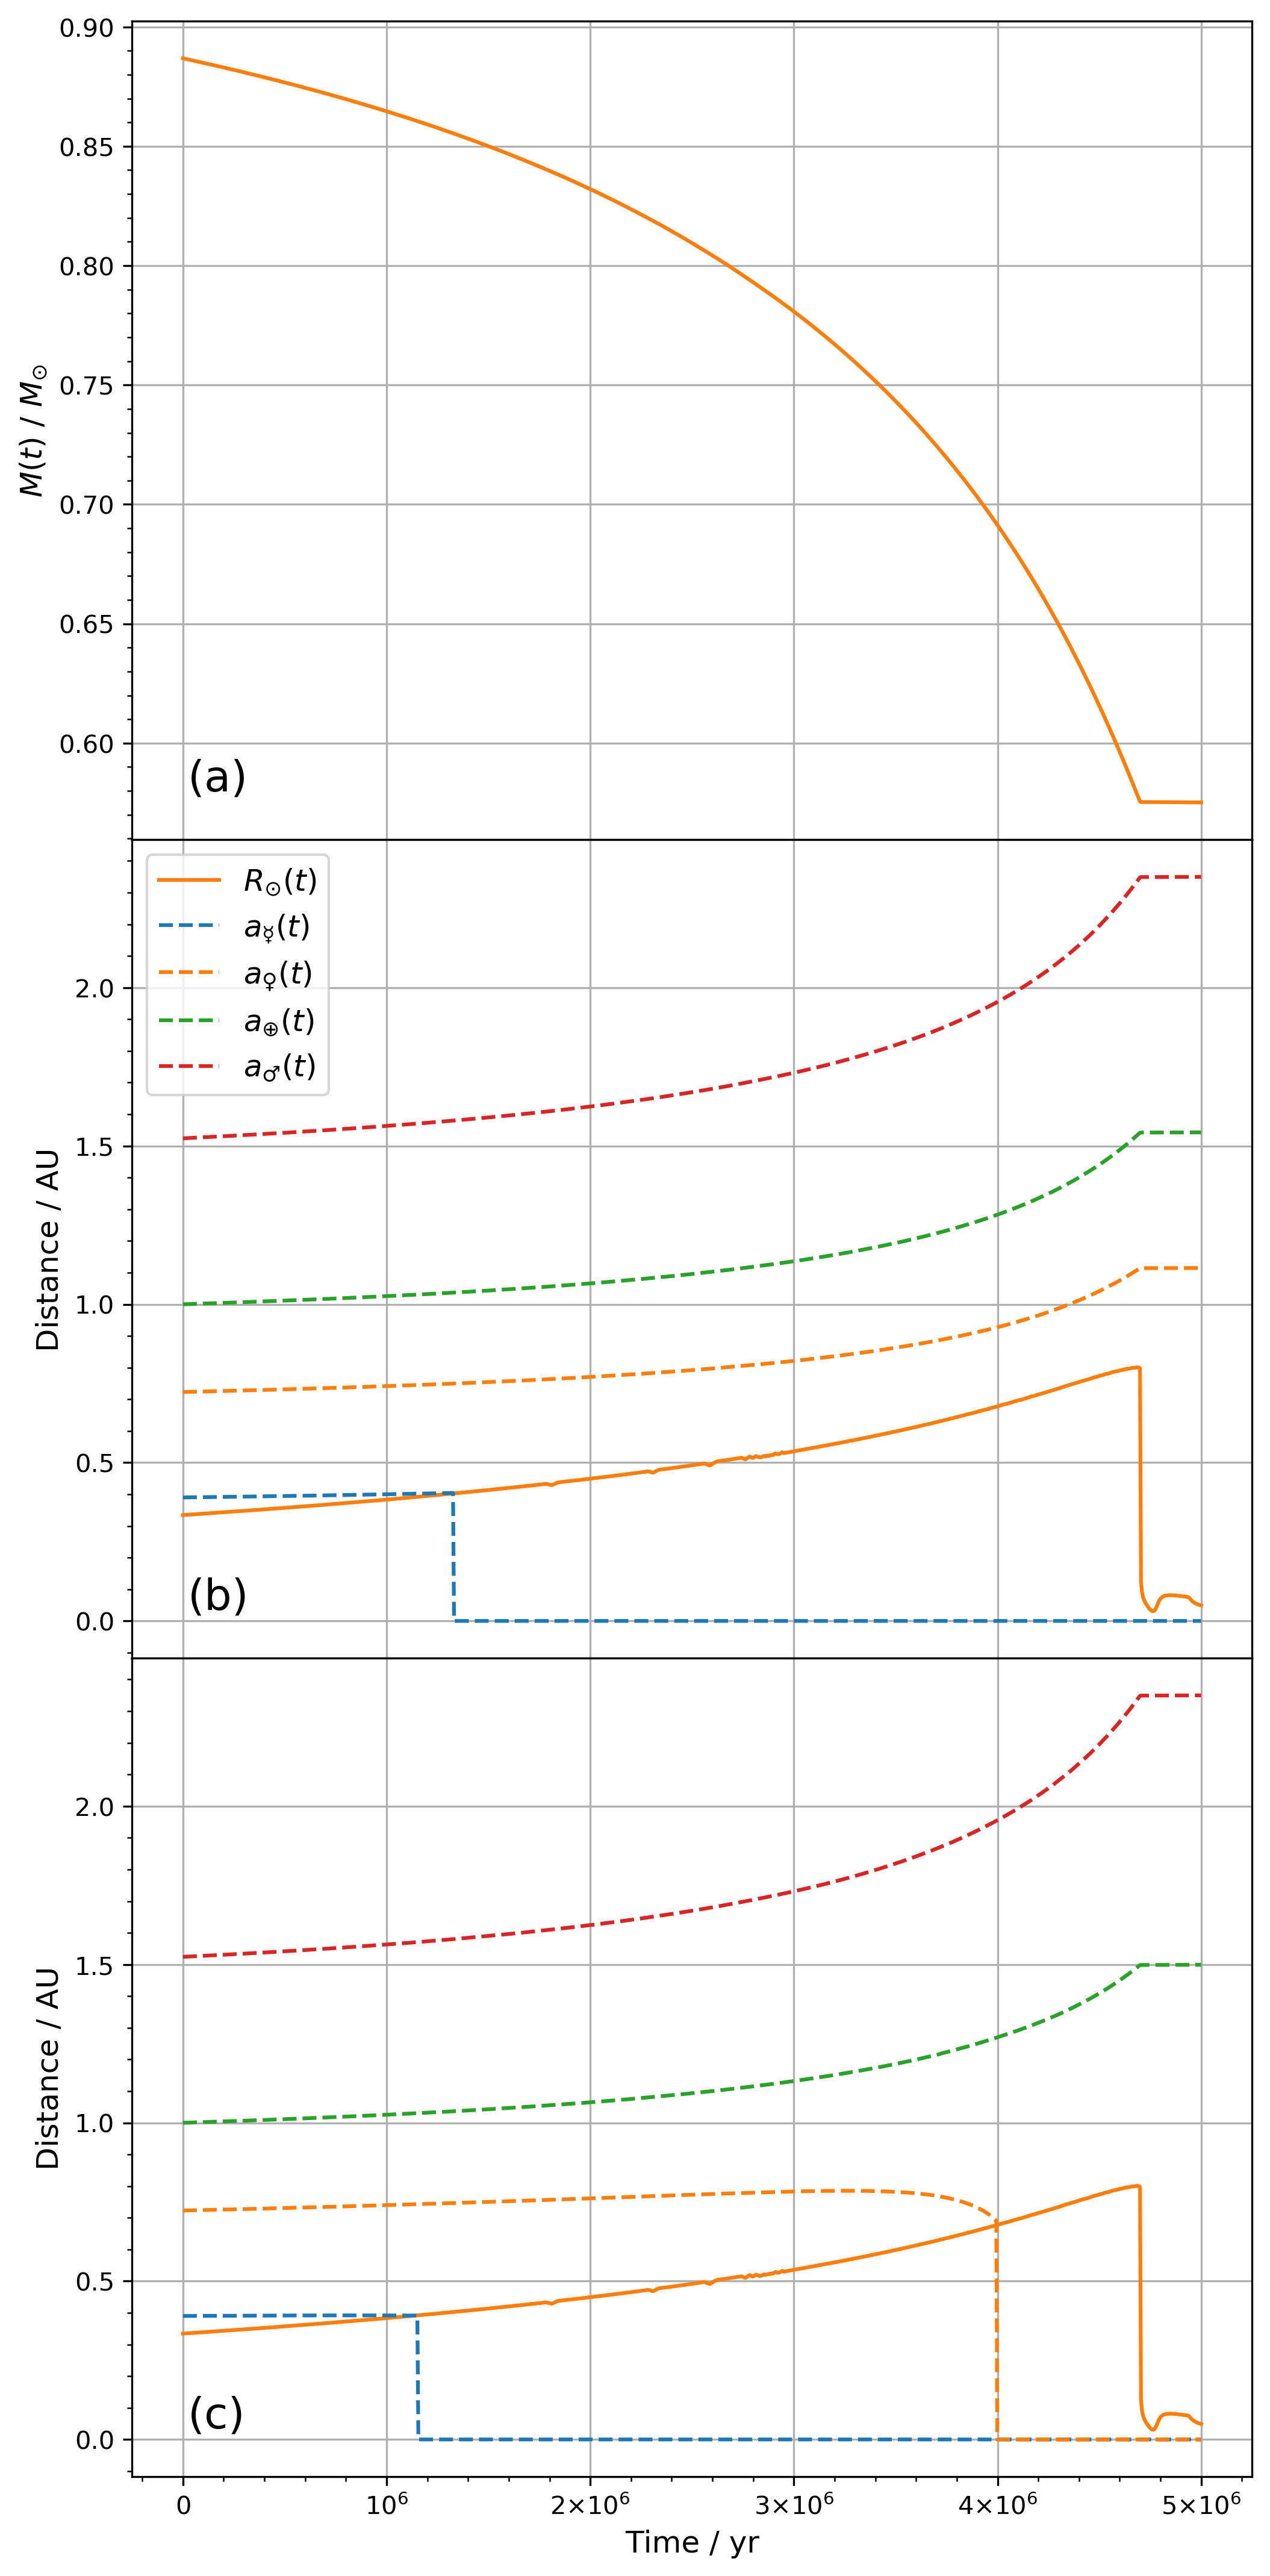

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
symbols = ['☉', '☿', '♀︎', '⊕', '♂︎']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 18), dpi=300)
fig.subplots_adjust(hspace=0)

ax1.set_ylabel("$M(t)$ / $M_{\odot}$", fontsize='large')
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.plot(ts,mass, color='tab:orange')
ax1.text(0.05, 0.1, '(a)', transform=ax1.transAxes, fontsize='xx-large',
        verticalalignment='top')
ax1.grid()

ax2.set_ylabel('Distance / AU', fontsize='large')
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.plot(ts,radius, color='tab:orange', label='$R_{\odot}(t)$')
for i in range(1, p):
    label = '$a_{%s}(t)$'%(symbols[i])
    ax2.plot(ts,a[:, i], '--', label=label)
ax2.legend(fontsize='large', loc='best')
ax2.text(0.05, 0.1, '(b)', transform=ax2.transAxes, fontsize='xx-large',
        verticalalignment='top')
ax2.grid()

ax3.set_xlabel('Time / yr', fontsize='large')
ax3.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax3.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.set_ylabel('Distance / AU', fontsize='large')
ax3.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.plot(ts,radius, color='tab:orange', label='$R_{\odot}(t)$')
for i in range(1, p):
    label = '$a_{%s}(t)$'%(symbols[i])
    ax3.plot(ts,atides[:, i], '--', label=label)
ax3.text(0.05, 0.1, '(c)', transform=ax3.transAxes, fontsize='xx-large',
        verticalalignment='top')
ax3.grid()

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('plots/terrestrial_comp.png')